In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
filename = "../../data/raw/laptop-data.csv"
df = pd.read_csv(filename)

In [4]:
df.shape

(1303, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns="Unnamed: 0", inplace=True)
df["Ram"] = df["Ram"].str.replace("GB", "")
df["Ram"] = df["Ram"].astype("int32")
df["Weight"] = df["Weight"].str.replace("kg", "")
df["Weight"] = df["Weight"].astype("float32")

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<ipython-input-9-bd11fd8d838a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<AxesSubplot: xlabel='Price', ylabel='Density'>

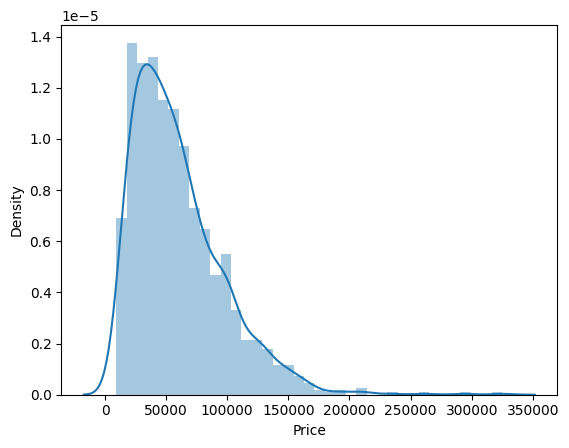

In [9]:
sns.distplot(df["Price"])

<AxesSubplot: >

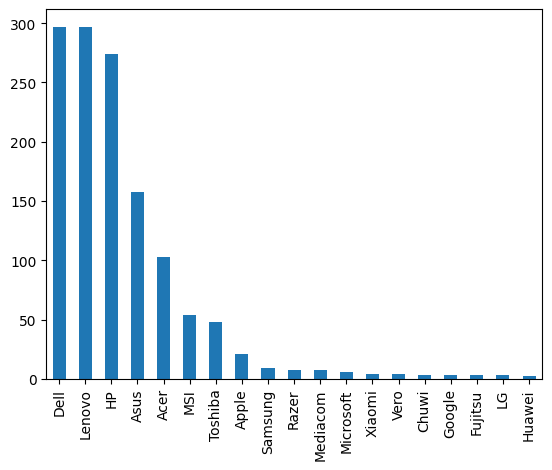

In [10]:
df["Company"].value_counts().plot(kind="bar")

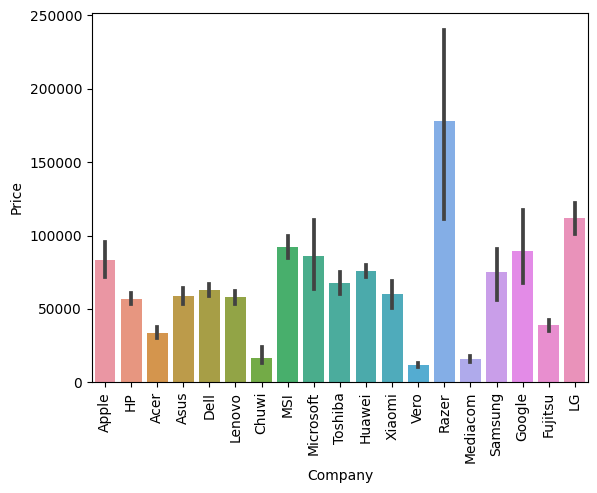

In [11]:
sns.barplot(x=df["Company"], y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

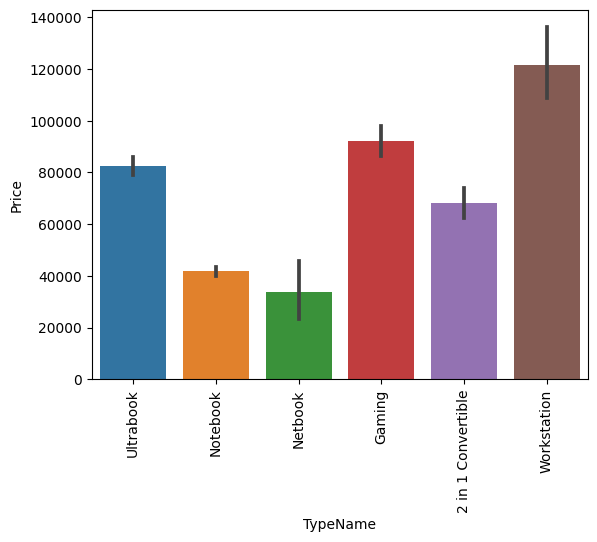

In [12]:
df["TypeName"].value_counts().plot(kind="bar")
sns.barplot(x=df["TypeName"], y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot: xlabel='Inches', ylabel='Count'>

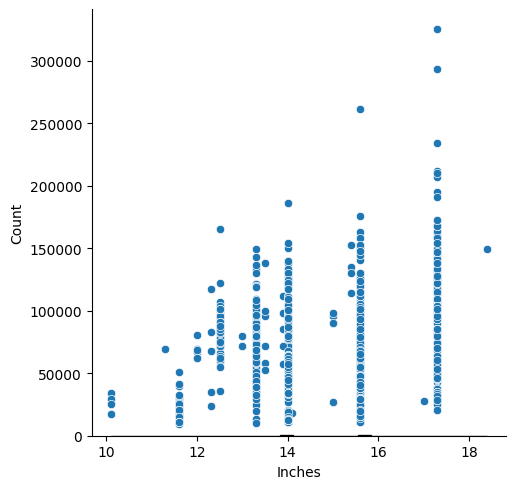

In [13]:
sns.displot(df["Inches"])
sns.scatterplot(x=df["Inches"], y=df["Price"])

In [14]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [15]:
df["Touchscreen"] = df["ScreenResolution"].apply(
    lambda x: 1 if "Touchscreen" in x else 0
)

<AxesSubplot: ylabel='Touchscreen'>

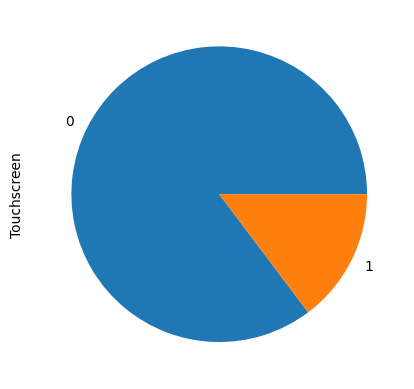

In [16]:
df["Touchscreen"].value_counts().plot(kind="pie")

<AxesSubplot: xlabel='Touchscreen', ylabel='Price'>

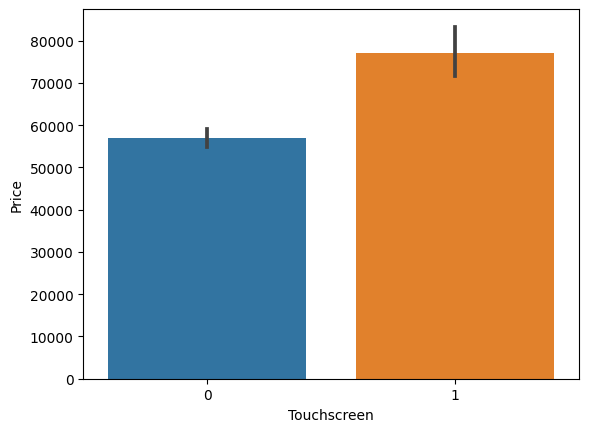

In [17]:
sns.barplot(x=df["Touchscreen"], y=df["Price"])

In [18]:
df["IPS"] = df["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

<AxesSubplot: >

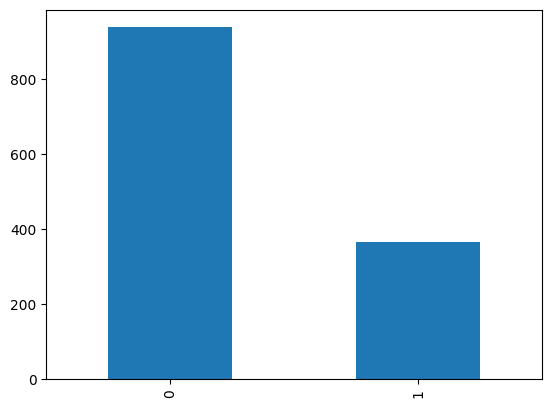

In [19]:
df["IPS"].value_counts().plot(kind="bar")

<AxesSubplot: xlabel='IPS', ylabel='Price'>

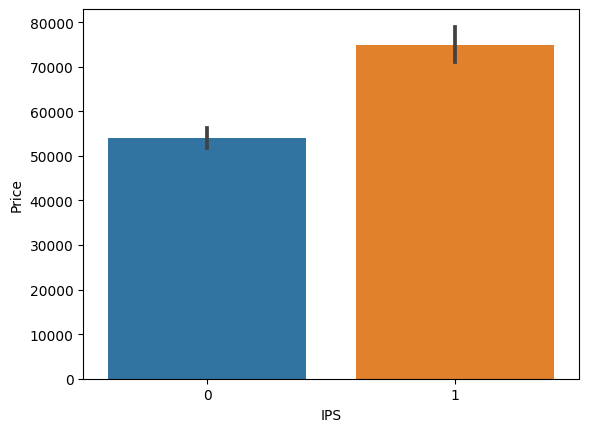

In [20]:
sns.barplot(x=df["IPS"], y=df["Price"])

In [21]:
tempFrame = df["ScreenResolution"].str.split("x", n=1, expand=True)
df["x_resolution"] = tempFrame[0]
df["y_resolution"] = tempFrame[1]

In [22]:
df["x_resolution"] = (
    df["x_resolution"]
    .replace(",", "")
    .str.findall(r"(\d+\.?\d+)")
    .apply(lambda x: x[0])
)

df["x_resolution"] = df["x_resolution"].astype("int32")
df["y_resolution"] = df["y_resolution"].astype("int32")
df.corr()["Price"]

<ipython-input-22-5b70484fed8b>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Inches          0.068197
Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
x_resolution    0.556529
y_resolution    0.552809
Name: Price, dtype: float64

In [23]:
df["PPI"] = (
    ((df["x_resolution"] ** 2) + (df["x_resolution"] ** 2))
    ** 0.5
    / df["Inches"].astype("float32")
)

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_resolution,y_resolution,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,272.209524
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,153.117857
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,174.057050
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,264.476309
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,272.209524


In [25]:
dropped_cols = ["ScreenResolution", "Inches", "x_resolution", "y_resolution"]
df.drop(columns=dropped_cols, inplace=True)

In [26]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209524
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117857
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057050
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476309
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209524


In [30]:
df["Cpu"].apply(lambda x: x.split()[:3])

0            [Intel, Core, i5]
1            [Intel, Core, i5]
2            [Intel, Core, i5]
3            [Intel, Core, i7]
4            [Intel, Core, i5]
                 ...          
1298         [Intel, Core, i7]
1299         [Intel, Core, i7]
1300    [Intel, Celeron, Dual]
1301         [Intel, Core, i7]
1302    [Intel, Celeron, Dual]
Name: Cpu, Length: 1303, dtype: object

In [31]:
df["Cpu Name"] = df["Cpu"].apply(lambda x: x.split()[:3])

In [32]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209524,"[Intel, Core, i5]"
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117857,"[Intel, Core, i5]"
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057050,"[Intel, Core, i5]"
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476309,"[Intel, Core, i7]"
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209524,"[Intel, Core, i5]"


In [33]:
df["Cpu Name"] = df["Cpu"].apply(lambda x: " ".join(x.split()[:3]))

In [34]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209524,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117857,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057050,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476309,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209524,Intel Core i5


In [35]:
def get_processor(processor_name: str) -> str:
    if (
        processor_name == "Intel Core i7"
        or processor_name == "Intel Core i5"
        or processor_name == "Intel Core i3"
    ):
        return processor_name
    else:
        if processor_name.split()[0] == "Intel":
            return "Misc Intel processor"
        else:
            return "AMD processor"

In [36]:
df["Cpu Brand"] = df["Cpu Name"].apply(get_processor)

In [37]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209524,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117857,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057050,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476309,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209524,Intel Core i5,Intel Core i5


In [38]:
df["Cpu Brand"].value_counts

<bound method IndexOpsMixin.value_counts of 0              Intel Core i5
1              Intel Core i5
2              Intel Core i5
3              Intel Core i7
4              Intel Core i5
                ...         
1298           Intel Core i7
1299           Intel Core i7
1300    Misc Intel processor
1301           Intel Core i7
1302    Misc Intel processor
Name: Cpu Brand, Length: 1303, dtype: object>

<AxesSubplot: >

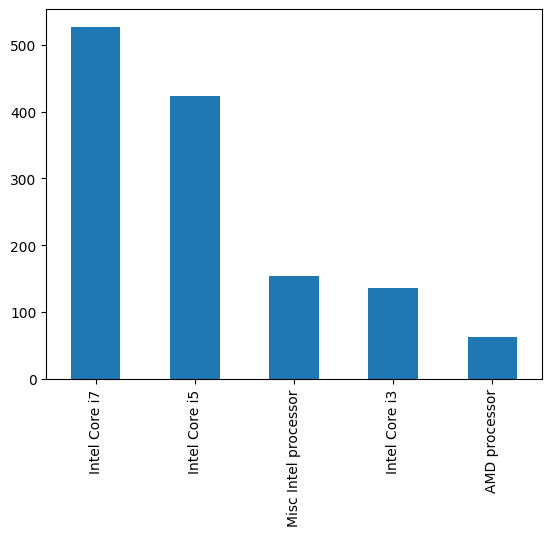

In [41]:
df["Cpu Brand"].value_counts().plot(kind="bar")

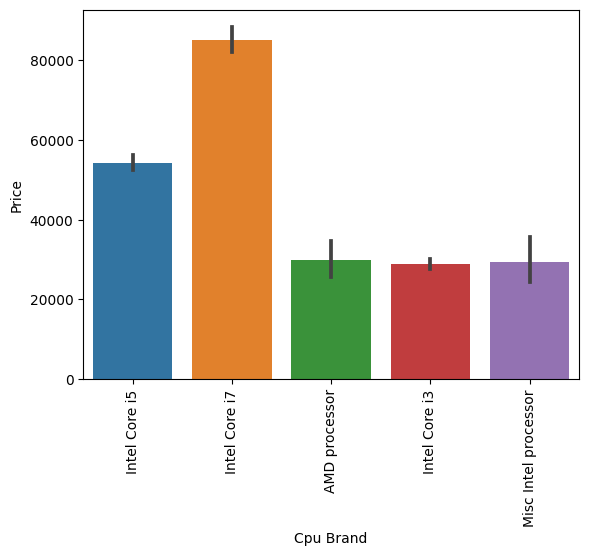

In [44]:
sns.barplot(x=df["Cpu Brand"], y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [45]:
dropped_cols_cpu = ["Cpu", "Cpu Name"]
df.drop(columns=dropped_cols_cpu, inplace=True)

In [46]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209524,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117857,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057050,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476309,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209524,Intel Core i5


<AxesSubplot: >

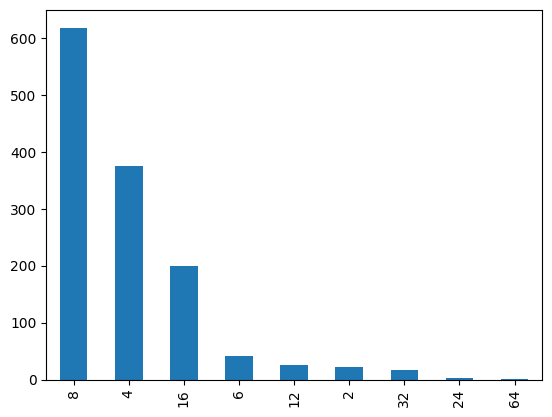

In [48]:
df["Ram"].value_counts().plot(kind="bar")

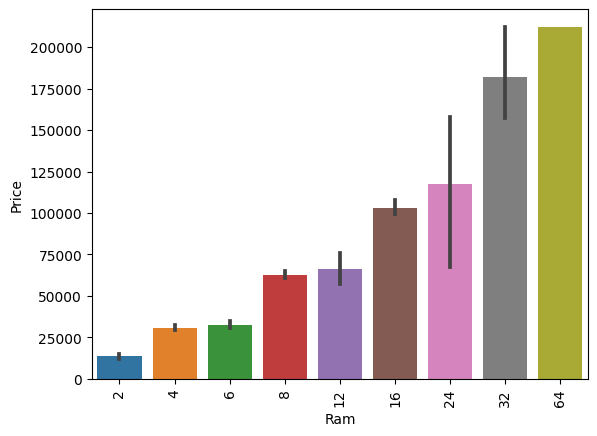

In [49]:
sns.barplot(x=df["Ram"], y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [50]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [51]:
df["Memory"] = df["Memory"].astype(str).replace("\.0", "", regex=True)
df["Memory"] = df["Memory"].str.replace("GB", "")
df["Memory"] = df["Memory"].str.replace("TB", "000")
temp_mem = df["Memory"].str.split("+", n=1, expand=True)

In [52]:
df["first"] = temp_mem[0]
df["first"] = df["first"].str.strip()
df["second"] = temp_mem[1]
df["L1_hdd"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["L1_ssd"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["L1_hyb"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["L1_fs"] = df["first"].apply(
    lambda x: 1 if "Flash Storage" in x else 0
)

In [53]:
df["first"] = df["first"].str.replace(r"\D", "")
df["second"].fillna("0", inplace=True)

<ipython-input-53-1eb3d755d8ff>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["first"] = df["first"].str.replace(r"\D", "")


In [54]:
df["L2_hdd"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["L2_ssd"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["L2_hyb"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["L2_fs"] = df["second"].apply(
    lambda x: 1 if "Flash Storage" in x else 0
)

In [55]:
df["second"] = df["second"].str.replace(r"\D", "")
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)
df["HDD"] = df["first"] * df["L1_hdd"] + df["second"] * df["L2_hdd"]
df["SSD"] = df["first"] * df["L1_ssd"] + df["second"] * df["L2_ssd"]
df["Hybrid"] = df["first"] * df["L1_hyb"] + df["second"] * df["L2_hyb"]
df["Flash_Storage"] = (
    df["first"] * df["L1_fs"] + df["second"] * df["L2_fs"]
)

<ipython-input-55-f607a30375ff>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["second"] = df["second"].str.replace(r"\D", "")


In [56]:
df.drop(
    columns=[
        "first",
        "second",
        "L1_hdd",
        "L1_ssd",
        "L1_hyb",
        "L1_fs",
        "L2_hdd",
        "L2_ssd",
        "L2_hyb",
        "L2_fs",
    ],
    inplace=True,
)

In [57]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209524,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117857,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057050,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476309,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209524,Intel Core i5,0,256,0,0


In [60]:
df.drop(columns=["Memory"], inplace=True)

In [61]:
df.corr()["Price"]

<ipython-input-61-870a02554510>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Price"]


Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.474973
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [62]:
df.drop(columns=["Hybrid", "Flash_Storage"], inplace=True)

In [63]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209524,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117857,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057050,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476309,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209524,Intel Core i5,0,256


In [64]:
df["Gpu"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Intel Iris Plus Graphics 640
1             Intel HD Graphics 6000
2              Intel HD Graphics 620
3                 AMD Radeon Pro 455
4       Intel Iris Plus Graphics 650
                    ...             
1298           Intel HD Graphics 520
1299           Intel HD Graphics 520
1300               Intel HD Graphics
1301              AMD Radeon R5 M330
1302               Intel HD Graphics
Name: Gpu, Length: 1303, dtype: object>

In [66]:
df["Gpu Brand"] = df["Gpu"].apply(lambda x: x.split()[0])

In [67]:
df["Gpu Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [68]:
df[df["Gpu Brand"] == "ARM"]

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,275.944105,AMD processor,0,0,ARM


In [69]:
df[df["Gpu Brand"] != "ARM"]

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209524,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117857,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057050,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476309,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209524,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,193.949289,Intel Core i7,0,128,Intel
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,340.261905,Intel Core i7,0,512,Intel
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,137.986838,Misc Intel processor,0,0,Intel
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,123.834338,Intel Core i7,1000,0,AMD


In [70]:
df["Gpu Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu Brand, dtype: int64

In [71]:
df = df[df["Gpu Brand"] != "ARM"]

In [72]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,272.209524,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,153.117857,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,174.057050,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,264.476309,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,272.209524,Intel Core i5,0,256,Intel


In [73]:
df["Gpu Brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu Brand, dtype: int64

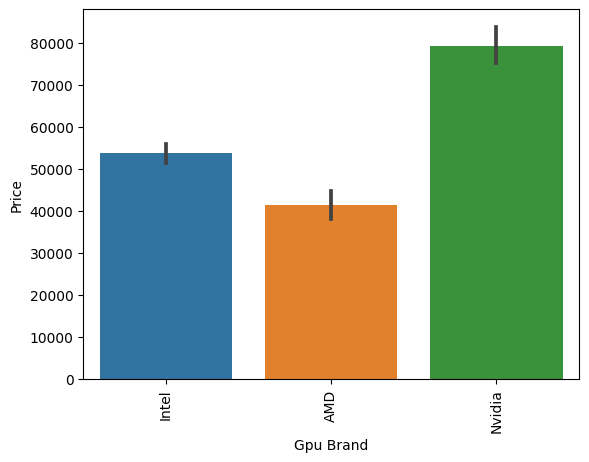

In [74]:
sns.barplot(x=df["Gpu Brand"], y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

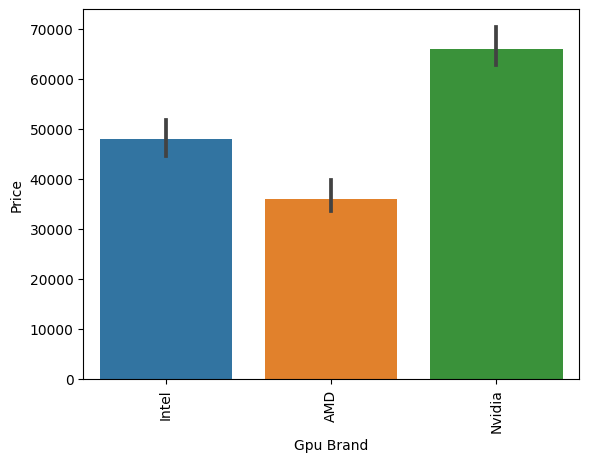

In [75]:
sns.barplot(x=df["Gpu Brand"], y=df["Price"],estimator=np.median)
plt.xticks(rotation="vertical")
plt.show()

In [76]:
df.drop(columns=["Gpu"], inplace=True)

In [77]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,272.209524,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,153.117857,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,174.057050,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,264.476309,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,272.209524,Intel Core i5,0,256,Intel


In [78]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

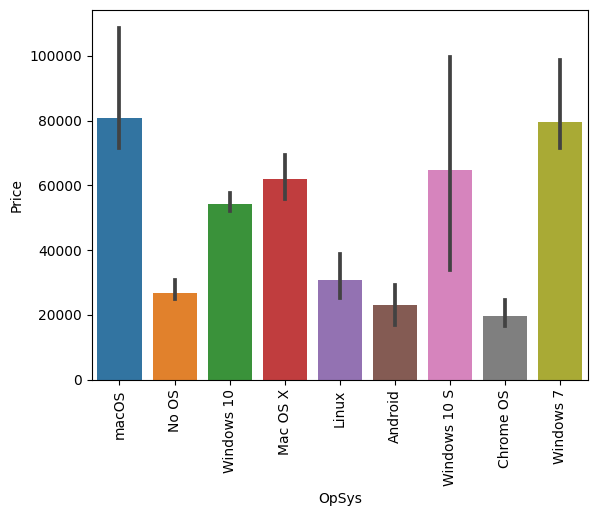

In [79]:
sns.barplot(x=df["OpSys"], y=df["Price"], estimator=np.median)
plt.xticks(rotation="vertical")
plt.show()

In [83]:
def simplify_os(os_name: str) -> str:
    if os_name == "Windows 10" or os_name == "Windows 7" or os_name == "Windows 10 S ":
        return "Windows"
    elif os_name == "macOS" or os_name == "Mac OS X":
        return "MacOS"
    elif os_name == "Linux":
        return os_name
    else:
        return "No OS / Chrome OS / Android"

In [84]:
df["os"] = df["OpSys"].apply(simplify_os)

In [85]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,272.209524,Intel Core i5,0,128,Intel,MacOS
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,153.117857,Intel Core i5,0,0,Intel,MacOS
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,174.057050,Intel Core i5,0,256,Intel,No OS / Chrome OS / Android
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,264.476309,Intel Core i7,0,512,AMD,MacOS
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,272.209524,Intel Core i5,0,256,Intel,MacOS


In [86]:
df.drop(columns=["OpSys"], inplace=True)

In [87]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,272.209524,Intel Core i5,0,128,Intel,MacOS
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,153.117857,Intel Core i5,0,0,Intel,MacOS
2,HP,Notebook,8,1.86,30636.0000,0,0,174.057050,Intel Core i5,0,256,Intel,No OS / Chrome OS / Android
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,264.476309,Intel Core i7,0,512,AMD,MacOS
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,272.209524,Intel Core i5,0,256,Intel,MacOS


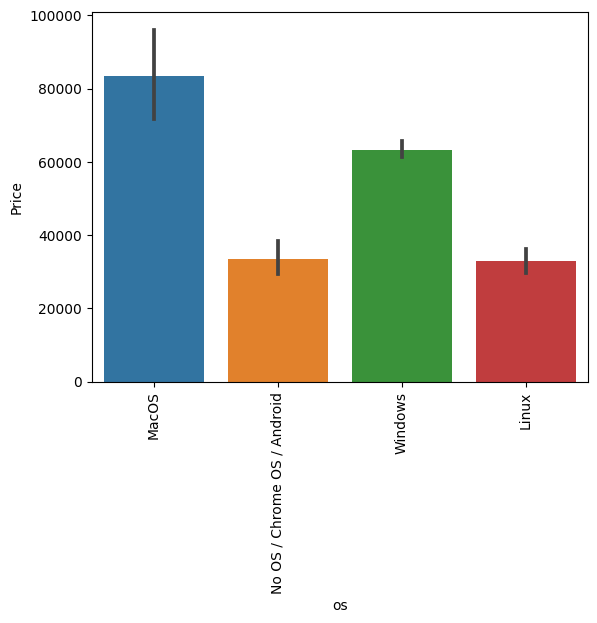

In [88]:
sns.barplot(x=df["os"], y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

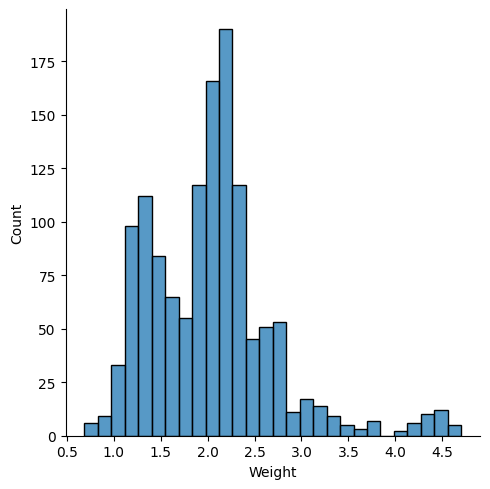

In [89]:
sns.displot(df["Weight"])

<AxesSubplot: xlabel='Weight', ylabel='Price'>

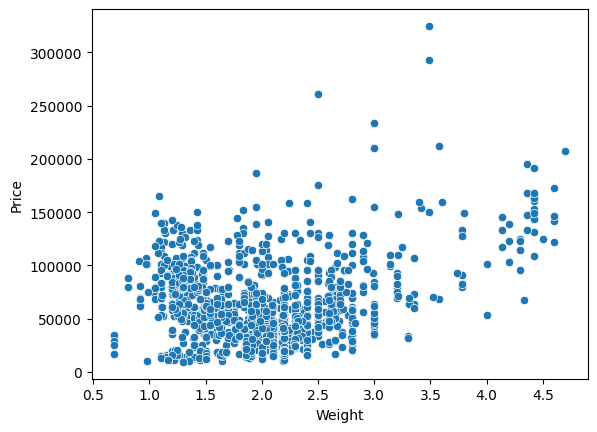

In [90]:
sns.scatterplot(x=df["Weight"], y=df["Price"])

<ipython-input-91-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

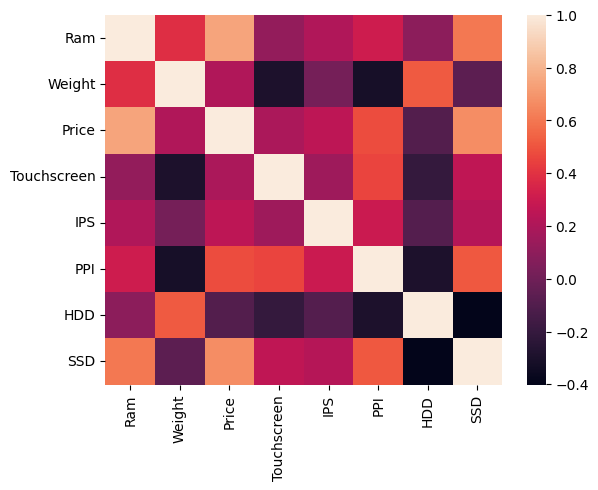

In [91]:
sns.heatmap(df.corr())

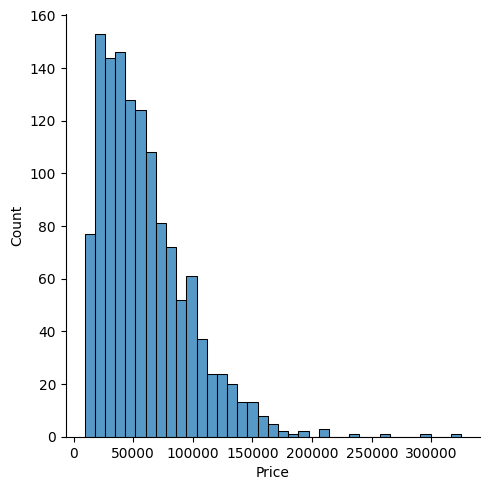

In [92]:
sns.displot(df["Price"])

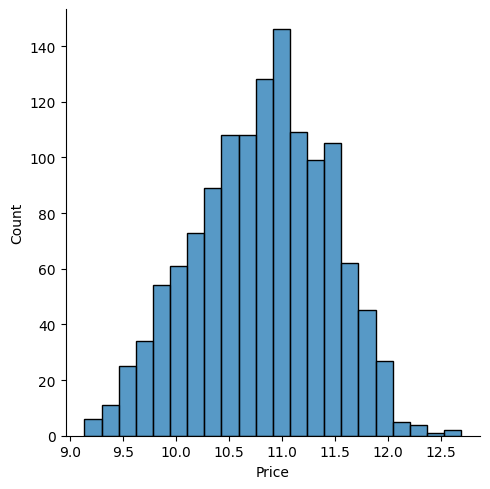

In [93]:
sns.displot(np.log(df["Price"]))

In [94]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu Brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,272.209524,Intel Core i5,0,128,Intel,MacOS
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,153.117857,Intel Core i5,0,0,Intel,MacOS
2,HP,Notebook,8,1.86,30636.0000,0,0,174.057050,Intel Core i5,0,256,Intel,No OS / Chrome OS / Android
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,264.476309,Intel Core i7,0,512,AMD,MacOS
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,272.209524,Intel Core i5,0,256,Intel,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,193.949289,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,340.261905,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,137.986838,Misc Intel processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,123.834338,Intel Core i7,1000,0,AMD,Windows


In [95]:
output_file = "../../data/processed/final-df.csv"

In [96]:
df.to_csv(output_file)